<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#FFFFFF'></span></b>Project UAS 2120101759</b></p>
</div>

# UAS Project Streamlit:
- **Nama:** Syubbanul Siddiq
- **Dataset:** Pada program ini menggunakan dua dataset. Dataset kriteria pasien Kanker paru-paru dan dataset ct-scan dada
- **URL Website:** https://kankerguardian-deteksi-kanker-app-app-4axbc5scpmj8mkviowcuzy.streamlit.app/
- https://github.com/siddiqodiq/kankerguardian-deteksi-kanker-streamlit-app/





**Pertanyaan Bisnis**


*   Bagaimana tingkat keandalan model dalam mengidentifikasi kasus kanker paru-paru dan kanker kulit?
*   Bagaimana proses pengumpulan, pembersihan, dan pengelolaan data medis untuk melatih model machine learning?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Model 1: Prediksi Kanker Paru-Paru

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm
from sklearn import metrics # for checking the model accuracy
%matplotlib inline

## Data Wrangling

### Gathering Data

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasetpp/uas/data.csv")
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

### Assessing Data

In [ ]:
df.shape

(1000, 26)

In [ ]:
# Mengecek jumlah nilai null di setiap kolom
null_counts = df.isnull().sum()

# Jika tidak ada data null, print pesan "tidak ada data null"
if null_counts.sum() == 0:
    print("Tidak Ada Data Null")
else:
    print("\nJumlah Data Null per Kolom:\n", null_counts)

Tidak Ada Data Null


In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### Cleaning Data

In [ ]:
# Menghapus baris yang memiliki setidaknya satu nilai yang hilang
df_cleaned = df.dropna()

In [ ]:
#menghapus kolom index dan patient id karena tidak digunakan
df.drop(df.columns[[0, 1]], axis=1, inplace=True)
df.head(3)

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


### Explore ...

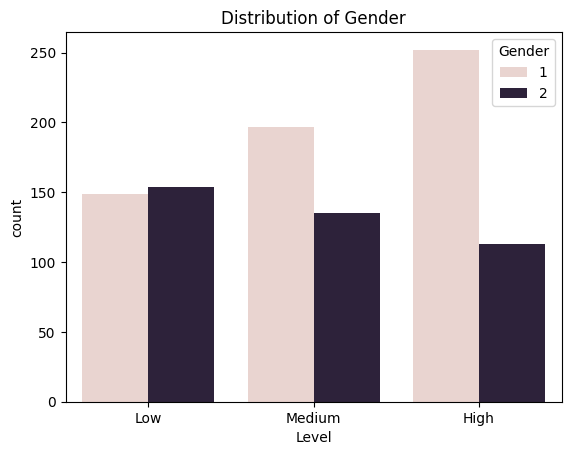

In [ ]:
# Visualisasi distribusi Gender dengan warna berbeda untuk setiap nilai
sns.countplot(x="Level",data=df,hue="Gender") #1=Pria , 2=Wanita
plt.title('Distribution of Gender')

plt.show()

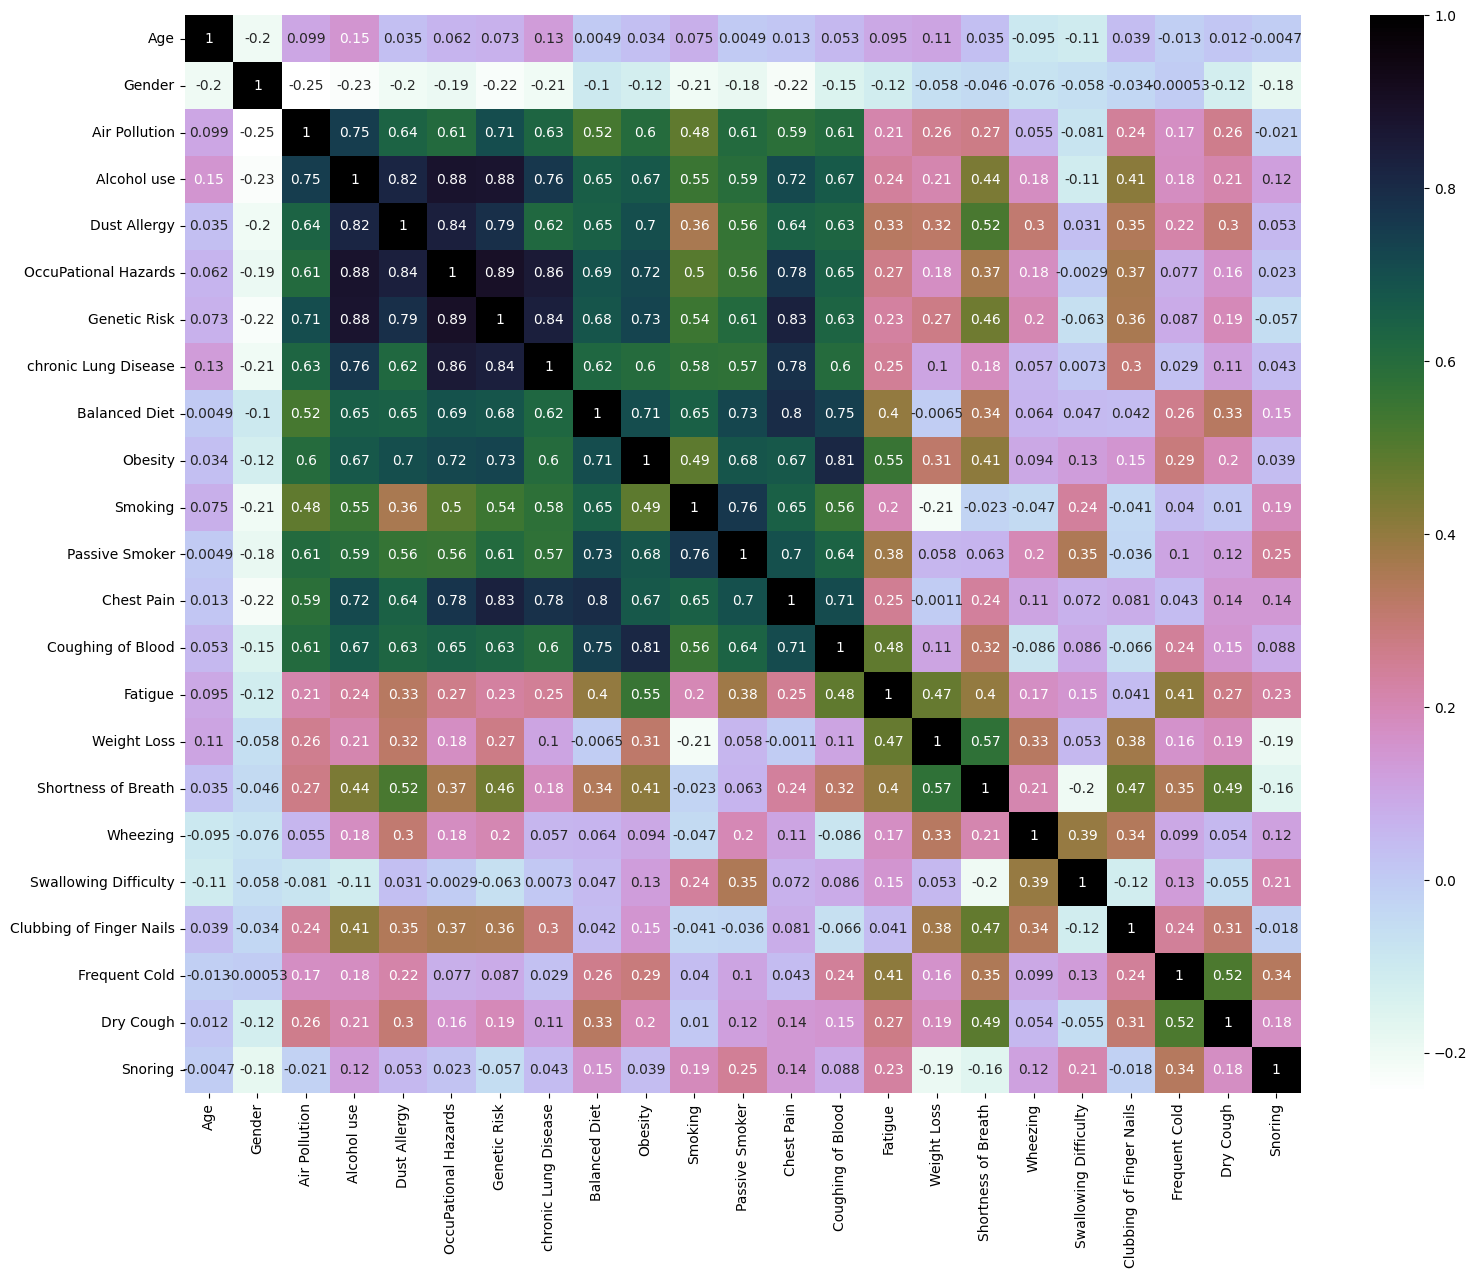

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap
plt.show()

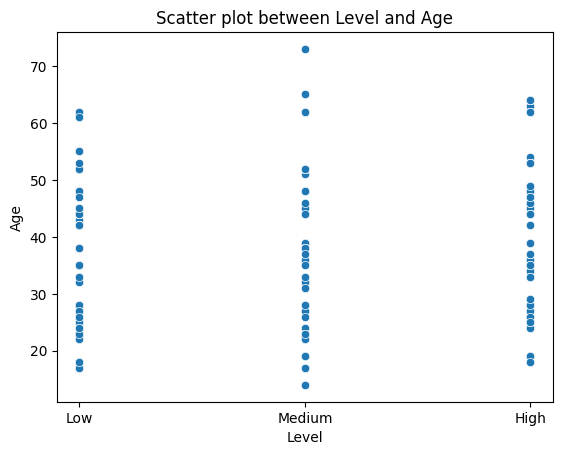

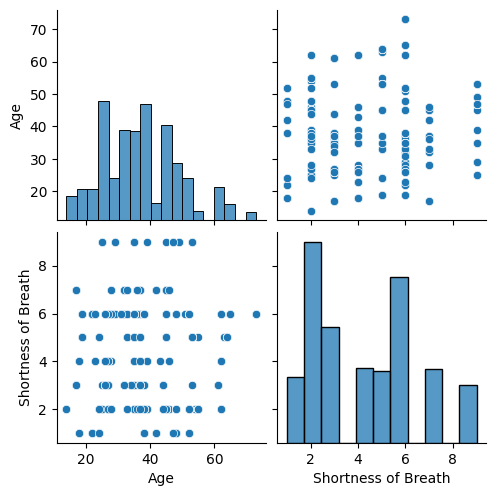

In [ ]:
# Contoh: Scatter plot antara 'Level' dan 'Age'
sns.scatterplot(x='Level', y='Age', data=df)
plt.title('Scatter plot between Level and Age')
plt.show()

# Pair plot untuk beberapa variabel numerik
sns.pairplot(df[['Level', 'Age', 'Shortness of Breath']])
plt.show()


## Visualization & Explanatory Analysis

###Pertanyaan 1: Bagaimana distribusi umur (Age) bervariasi antara tingkat kesehatan? Apakah ada kecenderungan bahwa usia lebih tinggi lebih cenderung mengalami kanker tingkat tinggi (high)?

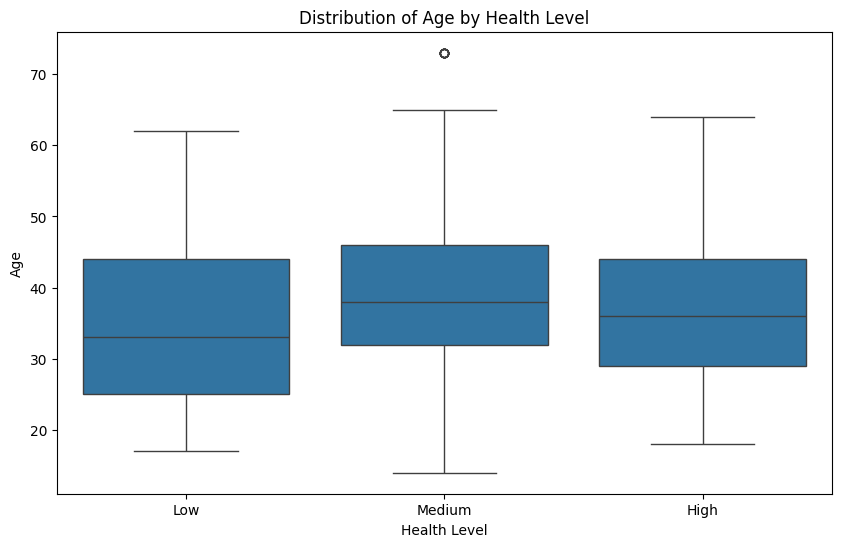

In [ ]:
# Box plot untuk 'Age' berdasarkan 'Level'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Age', data=df)
plt.title('Distribution of Age by Health Level')
plt.xlabel('Health Level')
plt.ylabel('Age')
plt.show()

Pasien dengan tingkat medium memiliki median umur yang paling tinggi

###Pertanyaan 2:Apakah ada kecenderungan bahwa mereka yang merokok cenderung memiliki tingkat kanker yang menengah atau tinggi?



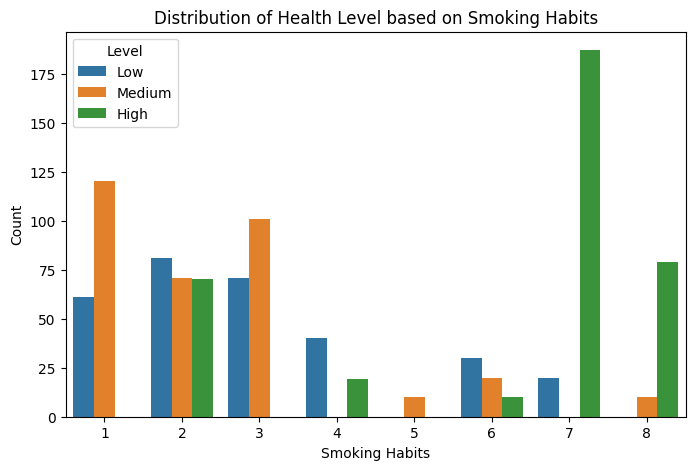

In [ ]:
# Count plot untuk 'Smoking' berdasarkan 'Level'
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking', hue='Level', data=df)
plt.title('Distribution of Health Level based on Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Count')
plt.show()

Pasien dengan kebiasaan merokok kebanyakan berada pada tingkat high

## Membuat Model

###Split Model

In [ ]:
X = df.drop(columns='Level', axis =1)
Y = df['Level']

In [ ]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 23) (800, 23) (200, 23)


###Menghapus fitur yang memiliki korelasi tinggi

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))


6

Proses yang dilakukan pada kode tersebut adalah untuk mengidentifikasi dan menghapus fitur-fitur yang memiliki korelasi tinggi di dalam dataset. Korelasi tinggi antara fitur-fitur dapat menjadi masalah dalam beberapa algoritma pembelajaran mesin karena dapat mengakibatkan multicollinearity, di mana satu fitur dapat dijelaskan oleh fitur lain, sehingga mempersulit interpretasi model.

In [ ]:
corr_features

{'Chest Pain',
 'Coughing of Blood',
 'Dust Allergy',
 'Genetic Risk',
 'OccuPational Hazards',
 'chronic Lung Disease'}

kolom tersebut dapat dihilangkan untuk meningkatkan kinerja model Machine Learning.

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [ ]:
train_data=Y_test
train_data
train_data.to_csv("testy.csv")

In [ ]:
testy = pd.read_csv("testy.csv")
testy.columns

Index(['Unnamed: 0', 'Level'], dtype='object')

In [ ]:
#pengecekan kedua untuk memastikan tidak ada kolom kolerasi tinggi
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.80)
len(set(corr_features))

0

###Building Model

####Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  98.375


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  95.5


In [ ]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       0.89      0.97      0.93        61
      Medium       0.97      0.89      0.93        66

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



####SVM (Support Vector Machine)

In [ ]:
classifier = svm.SVC(kernel='linear')

# we train the algorithm with training data and training output
classifier.fit(X_train, Y_train)

# we pass the testing data to the stored algorithm to predict the outcome
prediction_svm = classifier.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction_svm, Y_test)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  1.0


In [ ]:
print(classification_report(Y_test,prediction_svm))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Akurasi 100% diperoleh dari svm dan logistic

####Decision Tree

In [ ]:
dis_tree = DecisionTreeClassifier()
dis_tree.fit(X_train, Y_train)
prediction_dis = dis_tree.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction_dis, Y_test))

The accuracy of Decision Tree is:  1.0


In [ ]:
print(classification_report(Y_test,prediction_dis))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



###KNN

In [ ]:
knn_m = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
knn_m.fit(X_train, Y_train)
prediction1 = knn_m.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

The accuracy of KNN is:  1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



##Evaluasi Model

In [ ]:
prediction1

array(['Medium', 'Low', 'Medium', 'High', 'Low', 'High', 'High', 'Medium',
       'High', 'High', 'High', 'Medium', 'Low', 'High', 'High', 'Medium',
       'Low', 'Medium', 'High', 'High', 'High', 'High', 'High', 'Medium',
       'Low', 'High', 'High', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'High', 'Medium', 'Low', 'Low', 'Low', 'Low', 'High',
       'High', 'Medium', 'Low', 'Low', 'High', 'Medium', 'High', 'Low',
       'High', 'Medium', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Low', 'High', 'Low', 'High',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'High', 'Low', 'Medium', 'High', 'High', 'High', 'High',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Low'

In [ ]:
display(pd.DataFrame({"Predicted":prediction1,"Actual":Y_test}))

,Predicted,Actual
402,Medium,Medium
811,Low,Low
515,Medium,Medium
344,High,High
825,Low,Low
...,...,...
233,High,High
405,Medium,Medium
698,Medium,Medium
526,Medium,Medium


<Axes: >

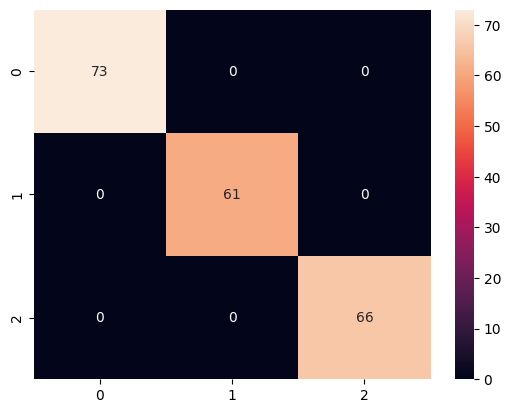

In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, prediction1)
sns.heatmap(cm, annot=True)

In [ ]:
print('Akurasi dari Logistic Regression adalah: ', metrics.accuracy_score(X_test_prediction, Y_test))
print('Akurasi dari SVM adalah: ', metrics.accuracy_score(prediction_svm, Y_test))
print('Akurasi dari Decision Tree adalah: ', metrics.accuracy_score(prediction_dis, Y_test))
print('Akurasi dari KNN adalah: ', metrics.accuracy_score(prediction1, Y_test))

Akurasi dari Logistic Regression adalah:  0.955
Akurasi dari SVM adalah:  1.0
Akurasi dari Decision Tree adalah:  1.0
Akurasi dari KNN adalah:  1.0


In [ ]:
input_data = (62,1,6,8,7,7,8,7,3,2,4,1,4,2,4,2,3) # hanya 17 inputan dari 23 kolum, karena kolom korelasi tinngi tidak termasuk

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0): #low -> normal case, #medium, high -> berpotensi dan atau kanker paru-paru
  print('Normal')
else:
  print('Kanker paru-paru')

['High']
Kanker paru-paru


##Menyimpan Model

In [ ]:
import pickle
filename = "prediksiparu.sav"
pickle.dump(classifier , open(filename,'wb'))

# Model 2: Deteksi Kanker Paru-Paru dengan CNN

## Import Semua Packages/Library yang Digunakan

In [ ]:
import os
%matplotlib inline
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array


## Data Wrangling

### Gathering Data

In [ ]:
base_dir = '/content/drive/MyDrive/datasetpp/uas/ctscan_images'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/test'))

Contents of base directory:
['test', 'train']

Contents of train directory:
['normal', 'lung_cancer']

Contents of validation directory:
['normal', 'lung_cancer']


In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with training cat/dog pictures
train_lung_cancer = os.path.join(train_dir, 'lung_cancer')
train_normal= os.path.join(train_dir, 'normal')

# Directory with validation cat/dog pictures
validation_lung_cancer = os.path.join(validation_dir, 'lung_cancer')
validation_normal = os.path.join(validation_dir, 'normal')

### Assessing Data

In [ ]:
print('total training lung cancer images :', len(os.listdir(  train_lung_cancer ) ))
print('total training normal images :', len(os.listdir(  train_normal ) ))

print('total validation lung caacer images :', len(os.listdir( train_lung_cancer ) ))
print('total validation normal images :', len(os.listdir( train_normal ) ))

total training lung cancer images : 486
total training normal images : 151
total validation lung caacer images : 486
total validation normal images : 151


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [ ]:
train_lung_cancer_fnames = os.listdir( train_lung_cancer )
train_normal_fnames = os.listdir( train_normal )

print(train_lung_cancer_fnames[:10])
print(train_normal_fnames[:10])

['000054 (1).png', '000093 (10).png', '000095 (6).png', '000050 (5).png', '000068 (10).png', '000040 (10).png', '000084 (4).png', '000087 (8).png', '000093 (6).png', '000075 (5).png']
['003828_02_01_174.png', '004162_01_01_150.png', '004007_01_01_519.png', '5.png', '6 - Copy - Copy.png', '6 - Copy (2) - Copy.png', '6 - Copy (2).png', '6 - Copy.png', '6 - Copy (3).png', '6 (2).png']


###Data Preprocessing

In [ ]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 637 images belonging to 2 classes.
Found 327 images belonging to 2 classes.


## Exploratory Data Analysis (EDA)

### Explore ...

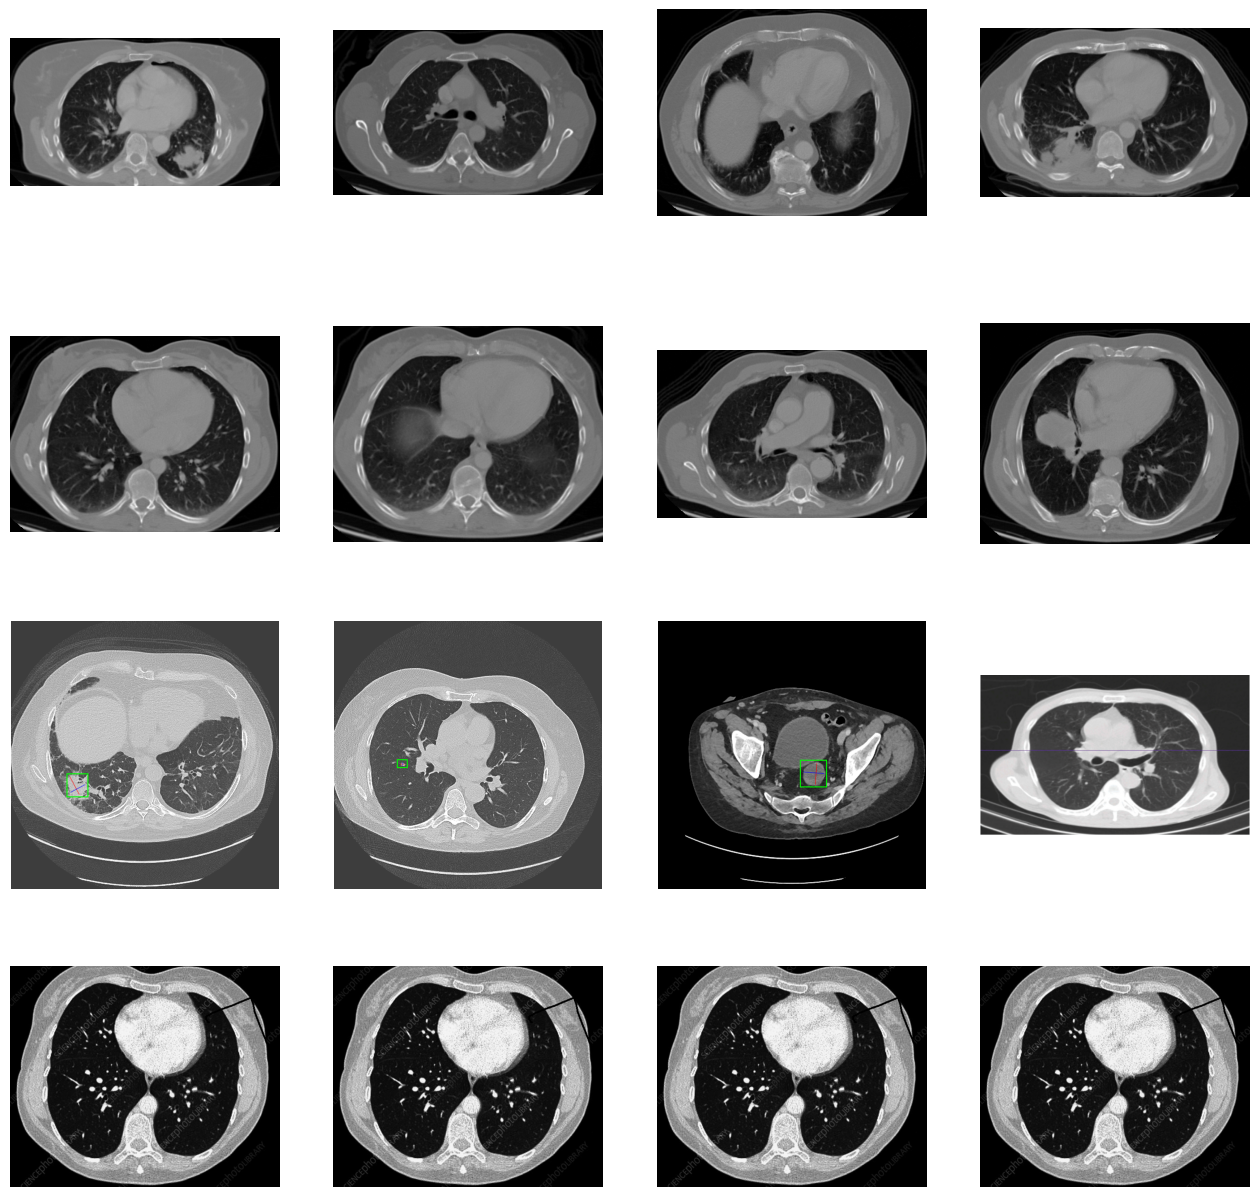

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_lung_cancer, fname)
                for fname in  train_lung_cancer_fnames[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_normal, fname)
                for fname in train_normal_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana representasi visual dari contoh gambar pada set pelatihan? Apakah terdapat variasi yang cukup dalam gambar kanker paru-paru dan normal?

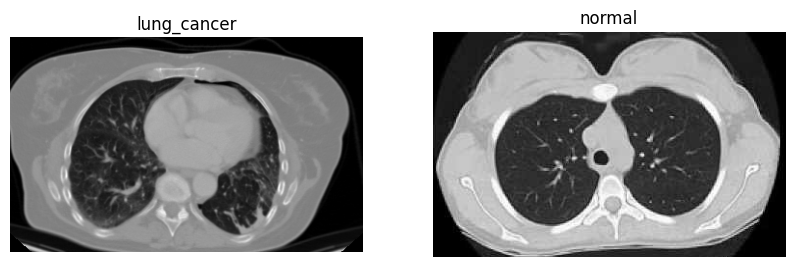

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

categories = ['lung_cancer', 'normal']
plt.figure(figsize=(10, 5))

for category in categories:
    path = os.path.join(train_dir, category)
    random_image = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_image)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 2, categories.index(category) + 1)
    plt.imshow(img)
    plt.title(category)
    plt.axis('off')

plt.show()


### Pertanyaan 2: Bagaimana distribusi jumlah gambar antara sub-direktori 'lung_cancer' dan 'normal' dalam set pelatihan dan validasi? Apakah ada perbedaan yang signifikan antara kategori?

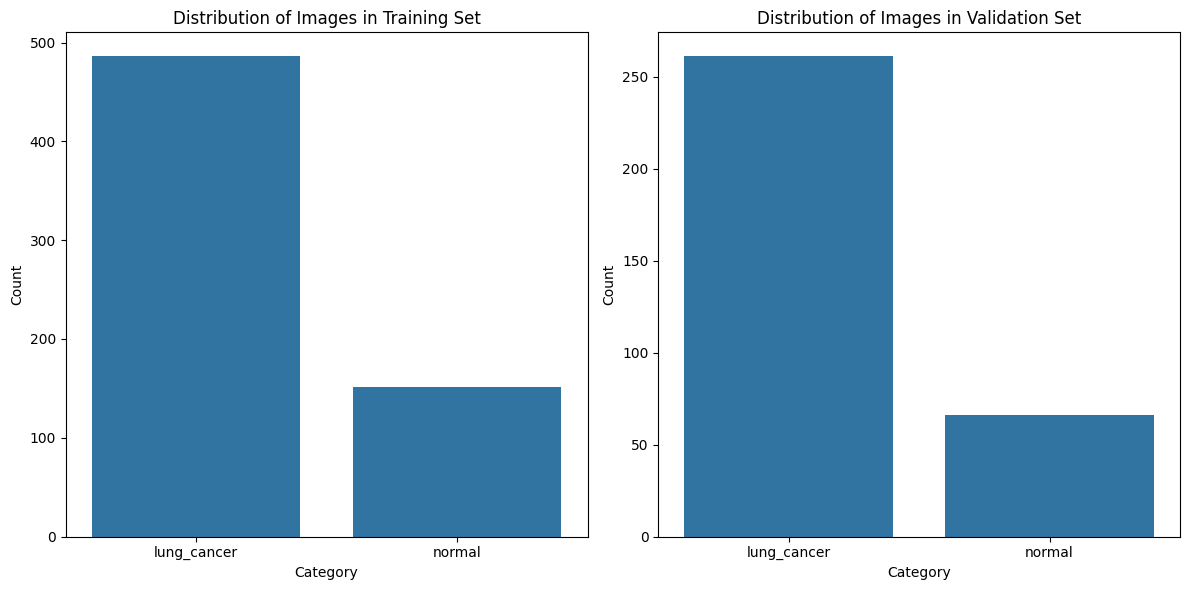

In [ ]:
# Menginisialisasi DataFrame untuk data pelatihan dan validasi
train_df = pd.DataFrame({'Category': ['lung_cancer'] * len(os.listdir(train_lung_cancer)) +
                                      ['normal'] * len(os.listdir(train_normal))})
validation_df = pd.DataFrame({'Category': ['lung_cancer'] * len(os.listdir(validation_lung_cancer)) +
                                           ['normal'] * len(os.listdir(validation_normal))})

plt.figure(figsize=(12, 6))

# Plot distribusi gambar dalam set pelatihan
plt.subplot(1, 2, 1)
sns.countplot(x='Category', data=train_df)
plt.title('Distribution of Images in Training Set')
plt.xlabel('Category')
plt.ylabel('Count')

# Plot distribusi gambar dalam set validasi
plt.subplot(1, 2, 2)
sns.countplot(x='Category', data=validation_df)
plt.title('Distribution of Images in Validation Set')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Membuat Model

Supaya mendapatkan Akurasi ++72% Untuk melatih neural network agar dapat menangani gambar, Kita harus menyamakan seluruh ukuran gambar. Pada kasus ini (150x150)

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

### Training Model

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2
            )

Epoch 1/15
32/32 - 8s - loss: 0.5756 - accuracy: 0.7834 - val_loss: 0.2479 - val_accuracy: 0.9388 - 8s/epoch - 256ms/step
Epoch 2/15
32/32 - 8s - loss: 0.1900 - accuracy: 0.9231 - val_loss: 0.2252 - val_accuracy: 0.9174 - 8s/epoch - 238ms/step
Epoch 3/15
32/32 - 7s - loss: 0.0943 - accuracy: 0.9686 - val_loss: 0.2756 - val_accuracy: 0.8991 - 7s/epoch - 214ms/step
Epoch 4/15
32/32 - 9s - loss: 0.0410 - accuracy: 0.9812 - val_loss: 0.3056 - val_accuracy: 0.8716 - 9s/epoch - 268ms/step
Epoch 5/15
32/32 - 7s - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.4583 - val_accuracy: 0.8349 - 7s/epoch - 212ms/step
Epoch 6/15
32/32 - 8s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.3756 - val_accuracy: 0.8593 - 8s/epoch - 238ms/step
Epoch 7/15
32/32 - 7s - loss: 9.1931e-04 - accuracy: 1.0000 - val_loss: 0.5976 - val_accuracy: 0.8287 - 7s/epoch - 227ms/step
Epoch 8/15
32/32 - 7s - loss: 0.2338 - accuracy: 0.9670 - val_loss: 0.3405 - val_accuracy: 0.8593 - 7s/epoch - 217ms/step
Epoch 9/15
32/32 - 8

### Evaluasi Model

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0][0]>0.5:
    print(fn + " paru-paru normal")
  else:
    print(fn + " paru-paru kanker")

Saving 000111.png to 000111 (1).png
1/1 [==============================] - 0s 69ms/step
[1.6959938e-06]
000111 (1).png paru-paru kanker


In [ ]:
model_loss= pd.DataFrame(history.history)
model_loss

,loss,accuracy,val_loss,val_accuracy
0,0.575585,0.783359,0.247880,0.938838
1,0.190014,0.923077,0.225163,0.917431
2,0.094309,0.968603,0.275614,0.899083
3,0.041003,0.981162,0.305647,0.871560
4,0.017242,0.995290,0.458272,0.834862
5,0.002404,1.000000,0.375579,0.859327
6,0.000919,1.000000,0.597562,0.828746
7,0.233793,0.967033,0.340509,0.859327
8,0.002580,1.000000,0.331436,0.883792
9,0.000615,1.000000,0.367874,0.871560


In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

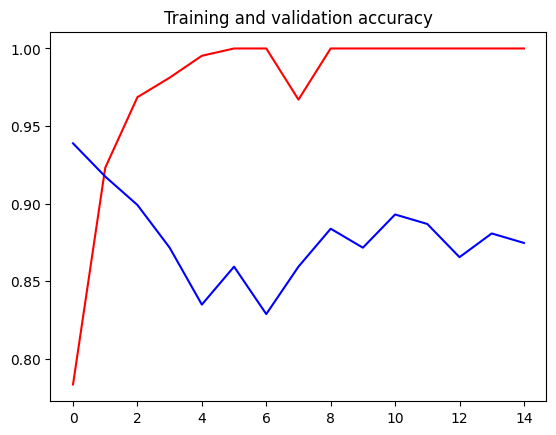

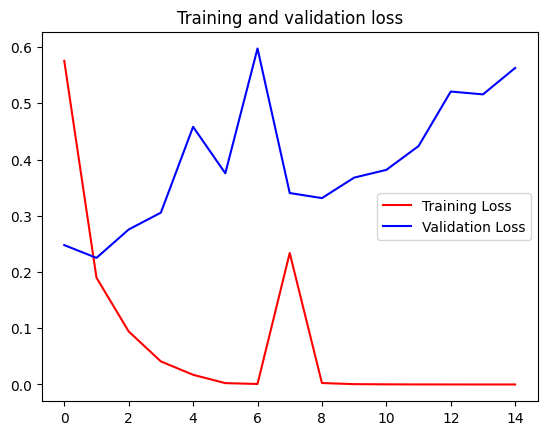

In [ ]:
# Plot training results
plot_loss_acc(history)

### Menyimpan Model

In [ ]:
from keras.models import load_model
model.save("cnn_paru.h5")

#Conclusion

Model dapat digunakan untuk melakukan prediksi kesehatan berdasarkan inputan yang diberikan. Pada contoh input_data yang diberikan, model memprediksi hasil "Normal," yang berarti kasus tersebut cenderung normal atau tidak berpotensi mengidap kanker paru-paru.


*   Conlusion Pertanyaan 1: Nilai akurasi pada setiap model diatas 90%. Akurasi tersebut sangat cukup untuk melakukan prediksi atau klasifikasi kanker paru-paru. Namun, pada project kali ini dataset yang digunakan tidak terlalu besar, hal ini mungkin akan berpengaruh pada beberapa kasus.
*   Conclusion pertanyaan 2: Pembersihan data melibatkan penanganan nilai hilang, penghapusan duplikat, deteksi dan penanganan outlier. Dataset didapat dari Kaggle

